In [1]:
# set up some environmental dependencies
import time, sys, os
import h5py
import numpy as np
from astropy.table import Table
import scipy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table
import astropy.cosmology.units as cu
import astropy.units as u
from matplotlib.pyplot import *
import seaborn as sns
import numpy as np, matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from astropy.io import ascii
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import matplotlib
import warnings
from scipy import stats
import scipy.stats
warnings.filterwarnings("ignore")

# standard imports for my work
from bpt_utils import *
from read_transients_data import *
from correct_redshift_evolution import *
from generate_bkg_galaxies import *
from helper_functions import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['image.origin'] = 'lower'
sns.set_context('talk') 
sns.set(font_scale=1.4)
sns.set_palette('colorblind')
sns.set_style('ticks')
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Verdana', 'Lucida Grande', 'DejaVu Sans']


### Box plots of all params

In [2]:
dsa_nr_frbs = read_dsa_data().reset_index()
askap_r_frbs = read_askap_r_frbs()
askap_nr_frbs = read_askap_nr_frbs()
cosmos_data = read_cosmos_data(True)

In [3]:
mstar_cosmos_samples = []
cosmos_data2 = cosmos_data.sample(100).reset_index()
for i in range(len(cosmos_data2)):
    mstar_cosmos_samples = mstar_cosmos_samples + generate_samples(cosmos_data2.logMstar[i], 
                                                                   -cosmos_data2.logMstar_errl[i], 
                                                                   cosmos_data2.logMstar_erru[i], 
                                                                   1000)

mstar_r_samples = []
for i in range(len(askap_r_frbs)):
    mstar_r_samples = mstar_r_samples + generate_samples(askap_r_frbs.logMstar[i], 
                                                         -askap_r_frbs.logMstar_errl[i], 
                                                         askap_r_frbs.logMstar_erru[i],
                                                         1000)

mstar_nr_samples = []
for i in range(len(dsa_nr_frbs)):
    mstar_nr_samples = mstar_nr_samples + generate_samples(dsa_nr_frbs.logMstar[i], 
                                                           np.abs(dsa_nr_frbs.logMstar_errl[i]), 
                                                           dsa_nr_frbs.logMstar_erru[i],
                                                           1000)
for i in range(len(askap_nr_frbs)):
    mstar_nr_samples = mstar_nr_samples + generate_samples(askap_nr_frbs.logMstar[i], 
                                                           np.abs(askap_nr_frbs.logMstar_errl[i]), 
                                                           askap_nr_frbs.logMstar_erru[i],
                                                           1000)

#################################################################################################

ssfr_cosmos_samples = []
cosmos_data2 = cosmos_data.sample(100).reset_index()
for i in range(len(cosmos_data2)):
    ssfr_cosmos_samples = ssfr_cosmos_samples + generate_samples(cosmos_data2.ssfr[i], 
                                                                 -cosmos_data2.ssfr_errl[i],
                                                                 cosmos_data2.ssfr_erru[i],
                                                                 1000)

ssfr_r_samples = []
for i in range(len(askap_r_frbs)):
    ssfr_r_samples = ssfr_r_samples + generate_samples(askap_r_frbs.ssfr[i], 
                                                       np.abs(askap_r_frbs.ssfr_errl[i]), 
                                                       askap_r_frbs.ssfr_erru[i],
                                                       1000)

ssfr_nr_samples = []
for i in range(len(dsa_nr_frbs)):
    ssfr_nr_samples = ssfr_nr_samples + generate_samples(dsa_nr_frbs.ssfr[i], 
                                                         np.abs(dsa_nr_frbs.ssfr_errl[i]), 
                                                         dsa_nr_frbs.ssfr_erru[i],
                                                         1000)
for i in range(len(askap_nr_frbs)):
    ssfr_nr_samples = ssfr_nr_samples + generate_samples(askap_nr_frbs.ssfr[i], 
                                                         np.abs(askap_nr_frbs.ssfr_errl[i]), 
                                                         np.abs(askap_nr_frbs.ssfr_erru[i]),
                                                         1000)

#################################################################################################

sfr_cosmos_samples = []
cosmos_data2 = cosmos_data.sample(100).reset_index()
for i in range(len(cosmos_data2)):
    sfr_cosmos_samples = sfr_cosmos_samples + generate_samples(np.log10(cosmos_data2.sfr_100Myr[i]), 
                                                               np.log10(cosmos_data2.sfr_100Myr[i])-np.log10(cosmos_data2.sfr_100Myr[i]+cosmos_data2.sfr_100Myr_errl[i]), 
                                                               np.log10(cosmos_data2.sfr_100Myr[i]+cosmos_data2.sfr_100Myr_erru[i])-np.log10(cosmos_data2.sfr_100Myr[i]),
                                                               1000)
    
sfr_r_samples = []
for i in range(len(askap_r_frbs)):
    sfr_r_samples = sfr_r_samples + generate_samples(np.log10(askap_r_frbs.sfr_100Myr[i]), 
                                                     np.log10(askap_r_frbs.sfr_100Myr[i])-np.log10(askap_r_frbs.sfr_100Myr[i]+askap_r_frbs.sfr_100Myr_errl[i]), 
                                                     np.log10(askap_r_frbs.sfr_100Myr[i]+askap_r_frbs.sfr_100Myr_erru[i])-np.log10(askap_r_frbs.sfr_100Myr[i]),
                                                     1000)

################################################################################################

sfr_nr_samples = []
for i in range(len(dsa_nr_frbs)):
    sfr_nr_samples = sfr_nr_samples + generate_samples(np.log10(dsa_nr_frbs.sfr_100Myr[i]), 
                                                       np.log10(dsa_nr_frbs.sfr_100Myr[i])-np.log10(dsa_nr_frbs.sfr_100Myr[i]+dsa_nr_frbs.sfr_100Myr_errl[i]), 
                                                       np.log10(dsa_nr_frbs.sfr_100Myr[i]+dsa_nr_frbs.sfr_100Myr_erru[i])-np.log10(dsa_nr_frbs.sfr_100Myr[i]),
                                                       1000)
for i in range(len(askap_nr_frbs)):
    sfr_nr_samples = sfr_nr_samples + generate_samples(np.log10(askap_nr_frbs.sfr_100Myr[i]), 
                                                       np.log10(askap_nr_frbs.sfr_100Myr[i])-np.log10(askap_nr_frbs.sfr_100Myr[i]+askap_nr_frbs.sfr_100Myr_errl[i]), 
                                                       np.log10(askap_nr_frbs.sfr_100Myr[i]+askap_nr_frbs.sfr_100Myr_erru[i])-np.log10(askap_nr_frbs.sfr_100Myr[i]),
                                                       1000)

################################################################################################

tm_cosmos_samples = []
cosmos_data2 = cosmos_data.sample(100).reset_index()
for i in range(len(cosmos_data2)):
    tm_cosmos_samples = tm_cosmos_samples + generate_samples(cosmos_data2.t_m[i], 
                                                             -cosmos_data2.t_m_errl[i], 
                                                             cosmos_data2.t_m_erru[i], 
                                                             1000)

tm_r_samples = []
for i in range(len(askap_r_frbs)):
    tm_r_samples = tm_r_samples + generate_samples(askap_r_frbs.t_m[i], 
                                                   np.abs(askap_r_frbs.t_m_errl[i]), 
                                                   askap_r_frbs.t_m_erru[i],
                                                   1000)

tm_nr_samples = []
for i in range(len(dsa_nr_frbs)):
    tm_nr_samples = tm_nr_samples + generate_samples(dsa_nr_frbs.t_m[i], 
                                                     np.abs(dsa_nr_frbs.t_m_errl[i]), 
                                                     dsa_nr_frbs.t_m_erru[i],
                                                     1000)
for i in range(len(askap_nr_frbs)):
    tm_nr_samples = tm_nr_samples + generate_samples(askap_nr_frbs.t_m[i], 
                                                     np.abs(askap_nr_frbs.t_m_errl[i]), 
                                                     np.abs(askap_nr_frbs.t_m_erru[i]),
                                                     1000)

z_cosmos_samples = []
cosmos_data2 = cosmos_data.sample(100).reset_index()
for i in range(len(cosmos_data2)):
    z_cosmos_samples = z_cosmos_samples + generate_samples(cosmos_data2.logzsol[i], 
                                                           -cosmos_data2.logzsol_errl[i], 
                                                           cosmos_data2.logzsol_erru[i],
                                                           1000)

z_r_samples = []
for i in range(len(askap_r_frbs)):
    z_r_samples = z_r_samples + generate_samples(askap_r_frbs.logzsol[i], 
                                                   np.abs(askap_r_frbs.logzsol_errl[i]), 
                                                   askap_r_frbs.logzsol_erru[i],
                                                   1000)

z_nr_samples = []
for i in range(len(dsa_nr_frbs)):
    z_nr_samples = z_nr_samples + generate_samples(dsa_nr_frbs.logzsol[i], 
                                                     np.abs(dsa_nr_frbs.logzsol_errl[i]), 
                                                     dsa_nr_frbs.logzsol_erru[i],
                                                     1000)
for i in range(len(askap_nr_frbs)):
    z_nr_samples = z_nr_samples + generate_samples(askap_nr_frbs.logzsol[i], 
                                                     np.abs(askap_nr_frbs.logzsol_errl[i]), 
                                                     np.abs(askap_nr_frbs.logzsol_erru[i]),
                                                     1000)

################################################################################################

Av_cosmos_samples = []
cosmos_data2 = cosmos_data.sample(100).reset_index()
for i in range(len(cosmos_data2)):
    Av_cosmos_samples = Av_cosmos_samples + generate_samples(cosmos_data2.Av_old[i], 
                                                             -cosmos_data2.Av_old_errl[i],
                                                             cosmos_data2.Av_old_erru[i],
                                                             1000)
Av_cosmos_samples = np.asarray(Av_cosmos_samples)
Av_cosmos_samples = Av_cosmos_samples[Av_cosmos_samples>0]
Av_cosmos_samples = list(Av_cosmos_samples)

Av_r_samples = []
for i in range(len(askap_r_frbs)):
    Av_r_samples = Av_r_samples + generate_samples(askap_r_frbs.Av_old[i], 
                                                   np.abs(askap_r_frbs.Av_old_errl[i]), 
                                                   askap_r_frbs.Av_old_erru[i],
                                                   1000)
Av_r_samples = np.asarray(Av_r_samples)
Av_r_samples = Av_r_samples[Av_r_samples>0]
Av_r_samples = list(Av_r_samples)
################################################################################################

Av_nr_samples = []
for i in range(len(dsa_nr_frbs)):
    Av_nr_samples = Av_nr_samples + generate_samples(dsa_nr_frbs.Av_old[i], 
                                                     np.abs(dsa_nr_frbs.Av_old_errl[i]), 
                                                     dsa_nr_frbs.Av_old_erru[i],
                                                     1000)

for i in range(len(askap_nr_frbs)):
    Av_nr_samples = Av_nr_samples + generate_samples(askap_nr_frbs.Av_old[i], 
                                                     np.abs(askap_nr_frbs.Av_old_errl[i]), 
                                                     np.abs(askap_nr_frbs.Av_old_erru[i]),
                                                     1000)
Av_nr_samples = np.asarray(Av_nr_samples)
Av_nr_samples = Av_nr_samples[Av_nr_samples>0]
Av_nr_samples = list(Av_nr_samples)

In [4]:
print_sigmas(mstar_r_samples, 1)

(9.643, -0.583, 0.536)

In [5]:
print_sigmas(mstar_nr_samples, 1)

(10.202, -0.721, 0.734)

In [6]:
print_sigmas(z_r_samples, 1)

(-1.171, -0.63, 0.575)

In [7]:
print_sigmas(z_nr_samples, 1)

(-0.449, -0.615, 0.522)

In [8]:
10**print_sigmas(sfr_r_samples, 1)[0], 10**(print_sigmas(sfr_r_samples, 1)[0]+print_sigmas(sfr_r_samples, 1)[1]), 10**(print_sigmas(sfr_r_samples, 1)[0]+print_sigmas(sfr_r_samples, 1)[2])


(0.9078205301781858, 0.03404081897010009, 2.6121613543992064)

In [9]:
10**print_sigmas(sfr_nr_samples, 1)[0], 10**(print_sigmas(sfr_nr_samples, 1)[0]+print_sigmas(sfr_nr_samples, 1)[1]), 10**(print_sigmas(sfr_nr_samples, 1)[0]+print_sigmas(sfr_nr_samples, 1)[2])


(1.132400363235557, 0.2710191631890843, 9.727472237769653)

In [10]:
10**print_sigmas(ssfr_r_samples, 1)[0], 10**(print_sigmas(ssfr_r_samples, 1)[0]+print_sigmas(ssfr_r_samples, 1)[1]), 10**(print_sigmas(ssfr_r_samples, 1)[0]+print_sigmas(ssfr_r_samples, 1)[2])


(0.14588142602753484, 0.007998342550070285, 0.6576578373554206)

In [11]:
10**print_sigmas(ssfr_nr_samples, 1)[0], 10**(print_sigmas(ssfr_nr_samples, 1)[0]+print_sigmas(ssfr_nr_samples, 1)[1]), 10**(print_sigmas(ssfr_nr_samples, 1)[0]+print_sigmas(ssfr_nr_samples, 1)[2])


(0.06870684400142321, 0.01803017740859569, 0.26363313858253795)

Text(0.02, 1.06, 'f')

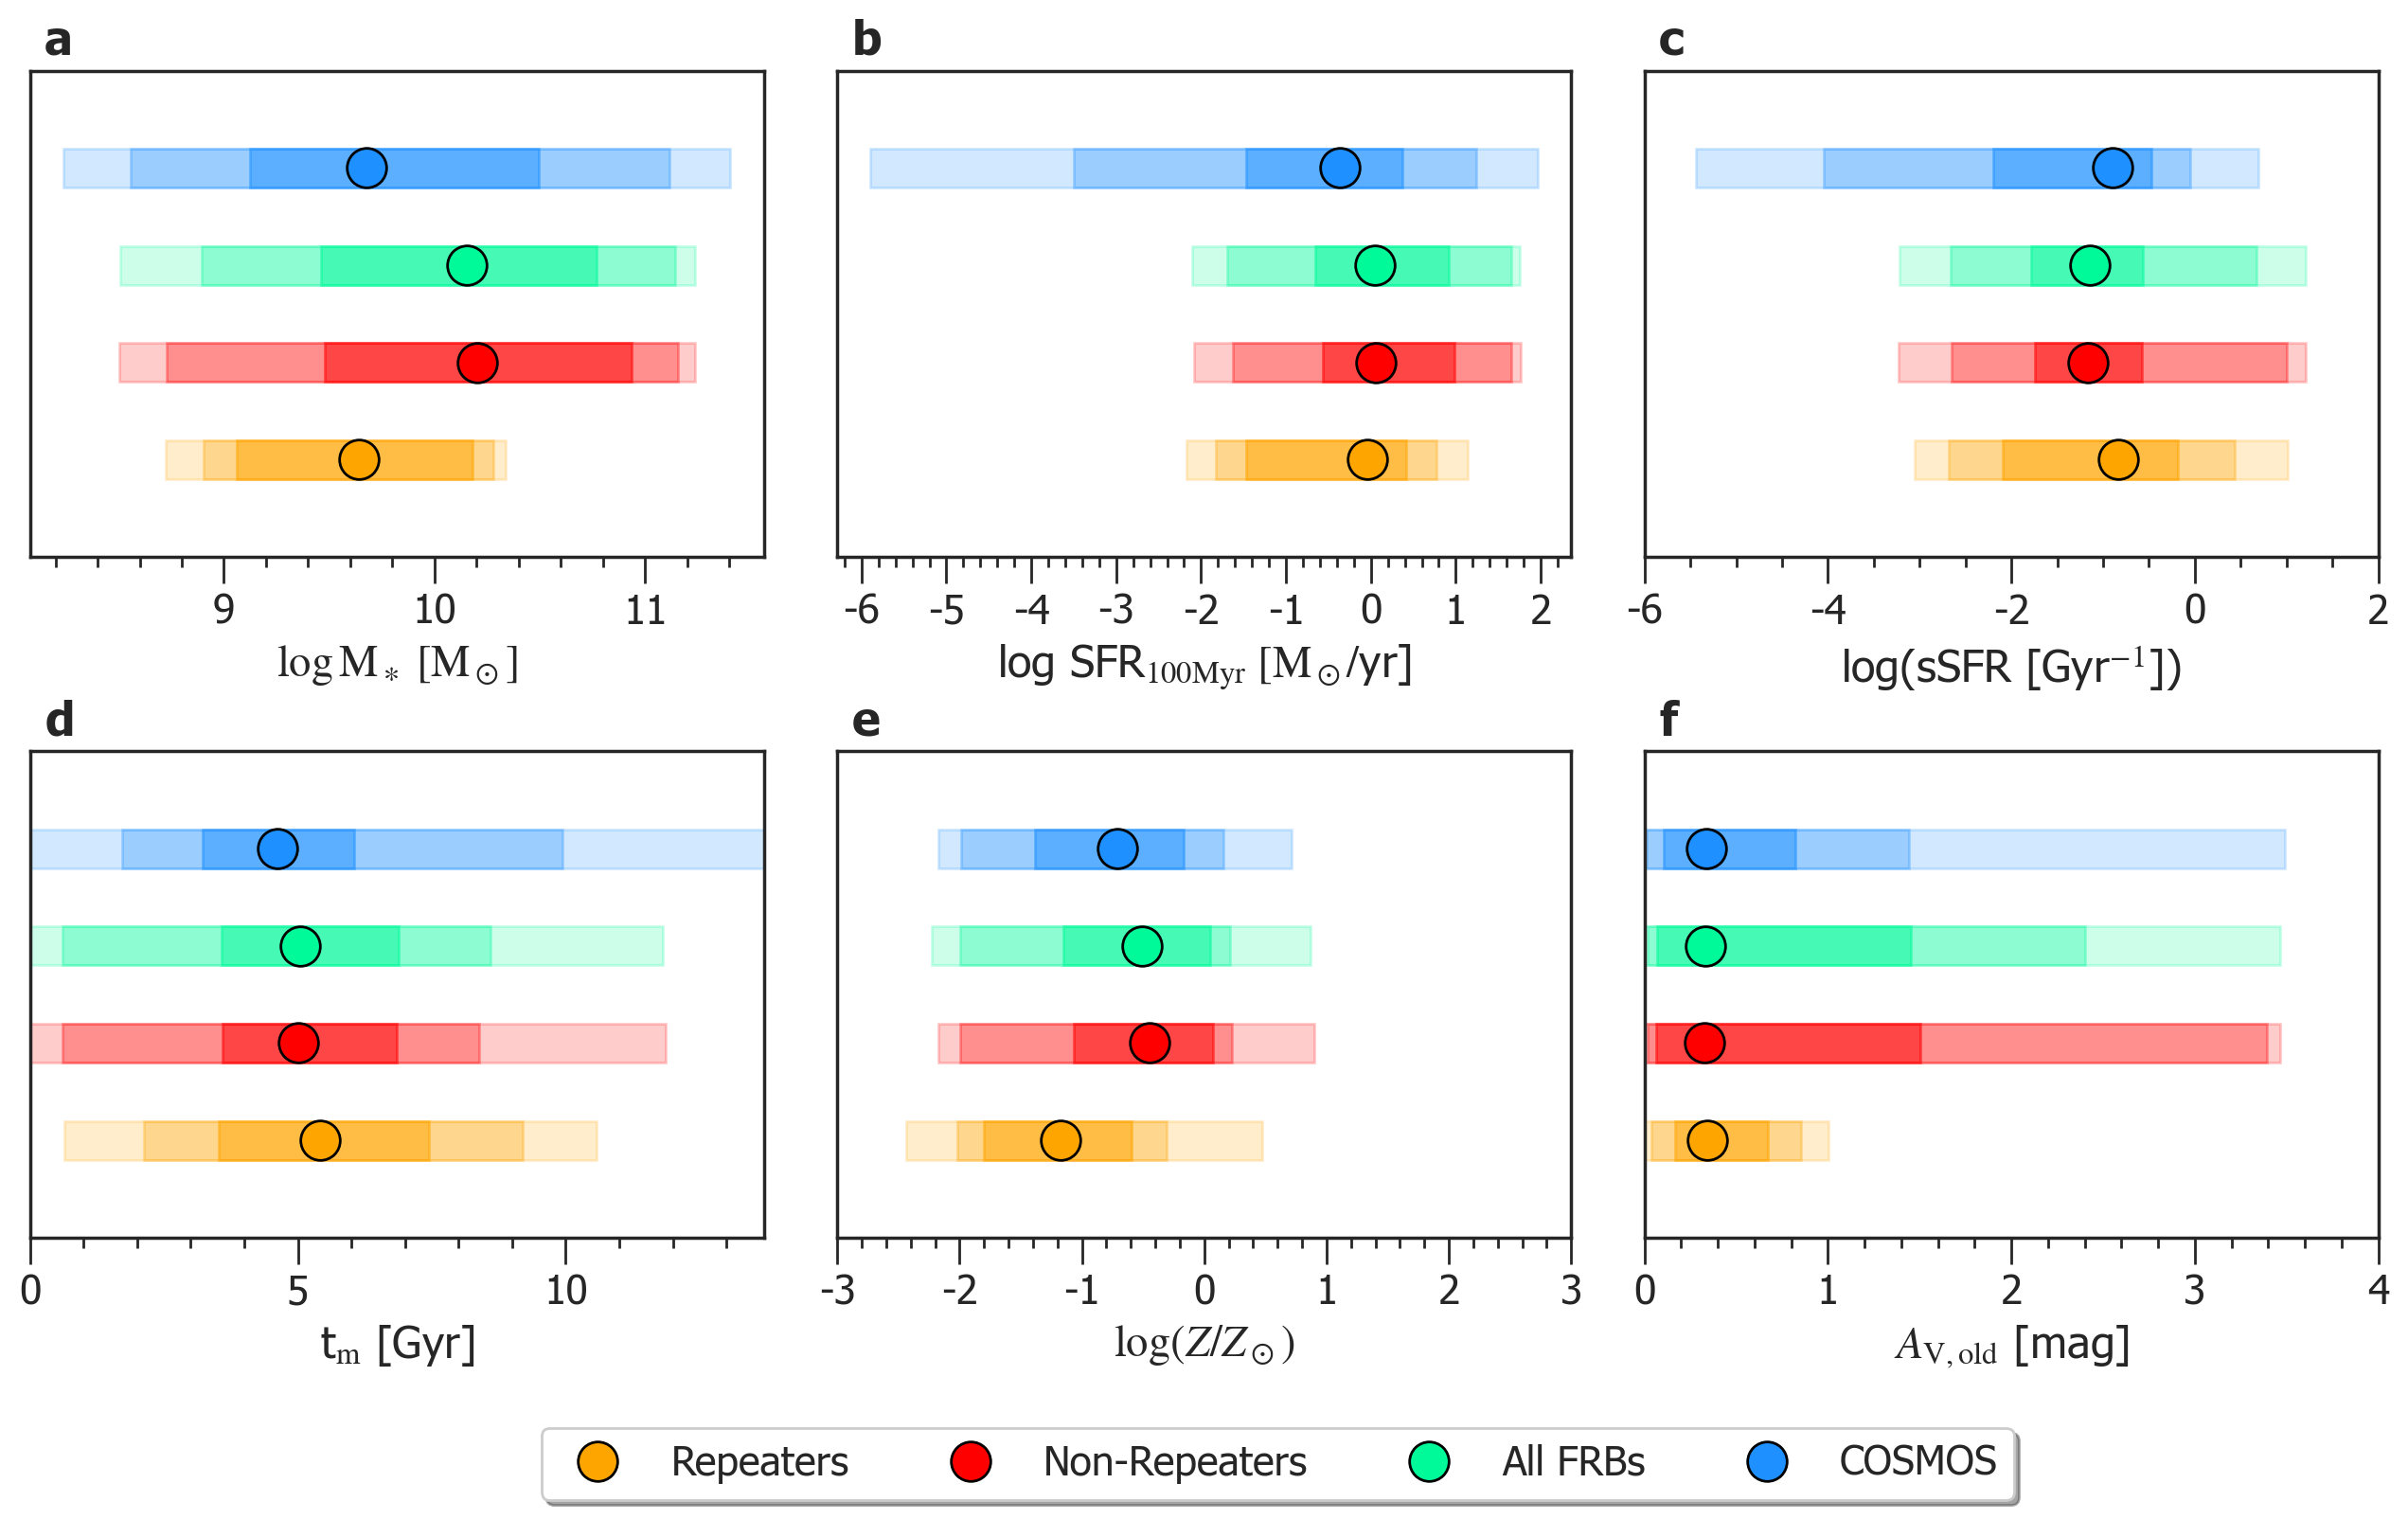

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 4*2))
plt.subplots_adjust(hspace=0.4, wspace=0.1)

x, t = 0.2, 0.04
mean, sig1, sig2 = print_sigmas(mstar_r_samples, 1)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='orange')
mean, sig1, sig2 = print_sigmas(mstar_r_samples, 2)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='orange')
mean, sig1, sig2 = print_sigmas(mstar_r_samples, 3)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='orange')
axes[0, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='orange', markeredgecolor='black', markeredgewidth=1, label="Repeaters")

x, t = 0.4, 0.04
mean, sig1, sig2 = print_sigmas(mstar_nr_samples, 1)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='red')
mean, sig1, sig2 = print_sigmas(mstar_nr_samples, 2)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='red')
mean, sig1, sig2 = print_sigmas(mstar_nr_samples, 3)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='red')
axes[0, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1, label="Non-Repeaters")

x, t = 0.6, 0.04
mean, sig1, sig2 = print_sigmas(mstar_r_samples+mstar_nr_samples, 1)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(mstar_r_samples+mstar_nr_samples, 2)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(mstar_r_samples+mstar_nr_samples, 3)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='mediumspringgreen')
axes[0, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='mediumspringgreen', markeredgecolor='black', markeredgewidth=1, label="All FRBs")

x, t = 0.8, 0.04
mean, sig1, sig2 = print_sigmas(mstar_cosmos_samples, 1)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(mstar_cosmos_samples, 2)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(mstar_cosmos_samples, 3)
axes[0, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='dodgerblue')
axes[0, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='dodgerblue', markeredgecolor='black', markeredgewidth=1, label="COSMOS")

axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")

                                                                                                                                                                                                                            
axes[0, 0].set_xticks(np.arange(8.5, 12, 0.5))                                                                                                                                                                                                                                  
axes[0, 0].xaxis.set_major_locator(MultipleLocator(1)) 
axes[0, 0].xaxis.set_minor_locator(MultipleLocator(0.2))
axes[0, 0].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[0, 0].tick_params(which='both', width=1)
axes[0, 0].tick_params(which='major', length=10)
axes[0, 0].tick_params(which='minor', length=4)
axes[0, 0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

axes[0, 0].legend(loc='upper center', bbox_to_anchor=(1.7, -1.75),
                  ncol=4, fancybox=True, shadow=True)


###########################################################################################


x, t = 0.2, 0.04
mean, sig1, sig2 = print_sigmas(sfr_r_samples, 1)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='orange')
mean, sig1, sig2 = print_sigmas(sfr_r_samples, 2)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='orange')
mean, sig1, sig2 = print_sigmas(sfr_r_samples, 3)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='orange')
axes[0, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='orange', markeredgecolor='black', markeredgewidth=1, label="Repeaters")

x, t = 0.4, 0.04
mean, sig1, sig2 = print_sigmas(sfr_nr_samples, 1)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='red')
mean, sig1, sig2 = print_sigmas(sfr_nr_samples, 2)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='red')
mean, sig1, sig2 = print_sigmas(sfr_nr_samples, 3)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='red')
axes[0, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1, label="Non-Repeaters")

x, t = 0.6, 0.04
mean, sig1, sig2 = print_sigmas(sfr_r_samples+sfr_nr_samples, 1)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(sfr_r_samples+sfr_nr_samples, 2)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(sfr_r_samples+sfr_nr_samples, 3)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='mediumspringgreen')
axes[0, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='mediumspringgreen', markeredgecolor='black', markeredgewidth=1, label="All FRBs")

x, t = 0.8, 0.04
mean, sig1, sig2 = print_sigmas(sfr_cosmos_samples, 1)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(sfr_cosmos_samples, 2)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(sfr_cosmos_samples, 3)
axes[0, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='dodgerblue')
axes[0, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='dodgerblue', markeredgecolor='black', markeredgewidth=1, label="COSMOS")

axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_xlabel(r"log SFR$_{\rm{100 Myr}}~[{\mathrm{M}}_\odot/$yr]")
                                                                                                                                                                                                           
axes[0, 1].set_xticks(np.arange(-5, 2.5, 1))                                                                                                                                                                                                                                  
axes[0, 1].xaxis.set_major_locator(MultipleLocator(1)) 
axes[0, 1].xaxis.set_minor_locator(MultipleLocator(0.2))
axes[0, 1].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[0, 1].tick_params(which='both', width=1)
axes[0, 1].tick_params(which='major', length=10)
axes[0, 1].tick_params(which='minor', length=4)
axes[0, 1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

###########################################################################################


x, t = 0.2, 0.04
mean, sig1, sig2 = print_sigmas(ssfr_r_samples, 1)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='orange')
mean, sig1, sig2 = print_sigmas(ssfr_r_samples, 2)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='orange')
mean, sig1, sig2 = print_sigmas(ssfr_r_samples, 3)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='orange')
axes[0, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='orange', markeredgecolor='black', markeredgewidth=1, label="Repeaters")

x, t = 0.4, 0.04
mean, sig1, sig2 = print_sigmas(ssfr_nr_samples, 1)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='red')
mean, sig1, sig2 = print_sigmas(ssfr_nr_samples, 2)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='red')
mean, sig1, sig2 = print_sigmas(ssfr_nr_samples, 3)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='red')
axes[0, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1, label="Non-Repeaters")

x, t = 0.6, 0.04
mean, sig1, sig2 = print_sigmas(ssfr_r_samples+ssfr_nr_samples, 1)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(ssfr_r_samples+ssfr_nr_samples, 2)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(ssfr_r_samples+ssfr_nr_samples, 3)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='mediumspringgreen')
axes[0, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='mediumspringgreen', markeredgecolor='black', markeredgewidth=1, label="All FRBs")

x, t = 0.8, 0.04
mean, sig1, sig2 = print_sigmas(ssfr_cosmos_samples, 1)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(ssfr_cosmos_samples, 2)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(ssfr_cosmos_samples, 3)
axes[0, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='dodgerblue')
axes[0, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='dodgerblue', markeredgecolor='black', markeredgewidth=1, label="COSMOS")
axes[0, 2].set_ylim(0, 1)

axes[0, 2].set_xlabel(r"log(sSFR [Gyr$^{-1}$])")
                                                                                                                                                                                                           
axes[0, 2].set_xticks(np.arange(-6, 2.5, 1))                                                                                                                                                                                                                                  
axes[0, 2].xaxis.set_major_locator(MultipleLocator(2)) 
axes[0, 2].xaxis.set_minor_locator(MultipleLocator(0.5))
axes[0, 2].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[0, 2].tick_params(which='both', width=1)
axes[0, 2].tick_params(which='major', length=10)
axes[0, 2].tick_params(which='minor', length=4)
axes[0, 2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

###########################################################################################


x, t = 0.2, 0.04
mean, sig1, sig2 = print_sigmas(tm_r_samples, 1)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='orange')
mean, sig1, sig2 = print_sigmas(tm_r_samples, 2)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='orange')
mean, sig1, sig2 = print_sigmas(tm_r_samples, 3)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='orange')
axes[1, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='orange', markeredgecolor='black', markeredgewidth=1, label="Repeaters")

x, t = 0.4, 0.04
mean, sig1, sig2 = print_sigmas(tm_nr_samples, 1)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='red')
mean, sig1, sig2 = print_sigmas(tm_nr_samples, 2)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='red')
mean, sig1, sig2 = print_sigmas(tm_nr_samples, 3)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='red')
axes[1, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1, label="Non-Repeaters")

x, t = 0.6, 0.04
mean, sig1, sig2 = print_sigmas(tm_r_samples+tm_nr_samples, 1)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(tm_r_samples+tm_nr_samples, 2)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(tm_r_samples+tm_nr_samples, 3)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='mediumspringgreen')
axes[1, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='mediumspringgreen', markeredgecolor='black', markeredgewidth=1, label="All FRBs")

x, t = 0.8, 0.04
mean, sig1, sig2 = print_sigmas(tm_cosmos_samples, 1)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(tm_cosmos_samples, 2)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(tm_cosmos_samples, 3)
axes[1, 0].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='dodgerblue')
axes[1, 0].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='dodgerblue', markeredgecolor='black', markeredgewidth=1, label="COSMOS")
axes[1, 0].set_ylim(0, 1)

axes[1, 0].set_xlabel(r"t$_{\rm{m}}$ [Gyr]")

axes[1, 0].set_xticks(np.arange(0, 13.7, 5))                                                                                                                                                                                                                                                                                                                                                                                                                                       
axes[1, 0].xaxis.set_major_locator(MultipleLocator(5)) 
axes[1, 0].xaxis.set_minor_locator(MultipleLocator(1))
axes[1, 0].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[1, 0].tick_params(which='both', width=1)
axes[1, 0].tick_params(which='major', length=10)
axes[1, 0].tick_params(which='minor', length=4)
axes[1, 0].set_xlim(0, 13.7) 
axes[1, 0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

###########################################################################################

x, t = 0.2, 0.04
mean, sig1, sig2 = print_sigmas(z_r_samples, 1)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='orange')
mean, sig1, sig2 = print_sigmas(z_r_samples, 2)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='orange')
mean, sig1, sig2 = print_sigmas(z_r_samples, 3)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='orange')
axes[1, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='orange', markeredgecolor='black', markeredgewidth=1, label="Repeaters")

x, t = 0.4, 0.04
mean, sig1, sig2 = print_sigmas(z_nr_samples, 1)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='red')
mean, sig1, sig2 = print_sigmas(z_nr_samples, 2)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='red')
mean, sig1, sig2 = print_sigmas(z_nr_samples, 3)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='red')
axes[1, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1, label="Non-Repeaters")

x, t = 0.6, 0.04
mean, sig1, sig2 = print_sigmas(z_r_samples+z_nr_samples, 1)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(z_r_samples+z_nr_samples, 2)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(z_r_samples+z_nr_samples, 3)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='mediumspringgreen')
axes[1, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='mediumspringgreen', markeredgecolor='black', markeredgewidth=1, label="All FRBs")

x, t = 0.8, 0.04
mean, sig1, sig2 = print_sigmas(z_cosmos_samples, 1)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(z_cosmos_samples, 2)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(z_cosmos_samples, 3)
axes[1, 1].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='dodgerblue')
axes[1, 1].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='dodgerblue', markeredgecolor='black', markeredgewidth=1, label="COSMOS")
axes[1, 1].set_ylim(0, 1)

axes[1, 1].set_xlabel(r"$\log(Z/Z_\odot)$")

axes[1, 1].set_xticks(np.arange(-3, 3, 1))                                                                                                                                                                                                                                                                                                                                                                                                                                       
axes[1, 1].xaxis.set_major_locator(MultipleLocator(1)) 
axes[1, 1].xaxis.set_minor_locator(MultipleLocator(0.2))
axes[1, 1].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[1, 1].tick_params(which='both', width=1)
axes[1, 1].tick_params(which='major', length=10)
axes[1, 1].tick_params(which='minor', length=4)
axes[1, 1].set_xlim(-3, 3)
axes[1, 1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

###########################################################################################

x, t = 0.2, 0.04
mean, sig1, sig2 = print_sigmas(Av_r_samples, 1)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='orange')
mean, sig1, sig2 = print_sigmas(Av_r_samples, 2)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='orange')
mean, sig1, sig2 = print_sigmas(Av_r_samples, 3)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='orange')
axes[1, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='orange', markeredgecolor='black', markeredgewidth=1, label="Repeaters")

x, t = 0.4, 0.04
mean, sig1, sig2 = print_sigmas(Av_nr_samples, 1)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='red')
mean, sig1, sig2 = print_sigmas(Av_nr_samples, 2)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='red')
mean, sig1, sig2 = print_sigmas(Av_nr_samples, 3)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='red')
axes[1, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1, label="Non-Repeaters")

x, t = 0.6, 0.04
mean, sig1, sig2 = print_sigmas(Av_r_samples+Av_nr_samples, 1)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(Av_r_samples+Av_nr_samples, 2)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='mediumspringgreen')
mean, sig1, sig2 = print_sigmas(Av_r_samples+Av_nr_samples, 3)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='mediumspringgreen')
axes[1, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='mediumspringgreen', markeredgecolor='black', markeredgewidth=1, label="All FRBs")

x, t = 0.8, 0.04
mean, sig1, sig2 = print_sigmas(Av_cosmos_samples, 1)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.5, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(Av_cosmos_samples, 2)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.3, color='dodgerblue')
mean, sig1, sig2 = print_sigmas(Av_cosmos_samples, 3)
axes[1, 2].axvspan(mean + sig1, mean + sig2, ymin=x-t, ymax=x+t, alpha=0.2, color='dodgerblue')
axes[1, 2].errorbar(mean, x, fmt="o", markersize=15, markerfacecolor='dodgerblue', markeredgecolor='black', markeredgewidth=1, label="COSMOS")
axes[1, 2].set_ylim(0, 1)

axes[1, 2].set_xlabel(r"$A_{{\mathrm{V, old}}}$ [mag]")

axes[1, 2].set_xticks(np.arange(0, 4, 1))                                                                                                                                                                                                                                                                                                                                                                                                                                       
axes[1, 2].xaxis.set_major_locator(MultipleLocator(1)) 
axes[1, 2].xaxis.set_minor_locator(MultipleLocator(0.2))
axes[1, 2].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[1, 2].tick_params(which='both', width=1)
axes[1, 2].tick_params(which='major', length=10)
axes[1, 2].tick_params(which='minor', length=4)
axes[1, 2].set_xlim(0, 4) 
axes[1, 2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


axes[0, 0].text(0.02, 1.06, "a", ha='left', va='center', weight='bold', 
         transform=axes[0, 0].transAxes, fontsize=18)
axes[0, 1].text(0.02, 1.06, "b", ha='left', va='center', weight='bold', 
         transform=axes[0, 1].transAxes, fontsize=18)
axes[0, 2].text(0.02, 1.06, "c", ha='left', va='center', weight='bold', 
         transform=axes[0, 2].transAxes, fontsize=18)

axes[1, 0].text(0.02, 1.06, "d", ha='left', va='center', weight='bold', 
         transform=axes[1, 0].transAxes, fontsize=18)
axes[1, 1].text(0.02, 1.06, "e", ha='left', va='center', weight='bold', 
         transform=axes[1, 1].transAxes, fontsize=18)
axes[1, 2].text(0.02, 1.06, "f", ha='left', va='center', weight='bold', 
         transform=axes[1, 2].transAxes, fontsize=18)


# plt.savefig('figures/all_params_box_plot.png', dpi=400, bbox_inches='tight')


### P-values

In [13]:
def print_pvalues(param):
    pvalue_r = []
    pvalue_nr = []
    pvalue_all = []
    for j in range(1000):
        samples_dsa_nr = []
        samples_askap_r = []
        samples_askap_nr = []

        for i in range(len(dsa_nr_frbs)):
            samples_dsa_nr = samples_dsa_nr + generate_samples(dsa_nr_frbs["{}".format(param)][i], 
                                                               -dsa_nr_frbs["{}_errl".format(param)][i], 
                                                               dsa_nr_frbs["{}_erru".format(param)][i], 
                                                               1)

        for i in range(len(askap_r_frbs)):
            samples_askap_r = samples_askap_r + generate_samples(askap_r_frbs["{}".format(param)][i], 
                                                             -askap_r_frbs["{}_errl".format(param)][i], 
                                                             askap_r_frbs["{}_erru".format(param)][i], 
                                                             1)
        
        for i in range(len(askap_nr_frbs)):
            samples_askap_nr = samples_askap_nr + generate_samples(askap_nr_frbs["{}".format(param)][i], 
                                                                   -askap_nr_frbs["{}_errl".format(param)][i], 
                                                                   askap_nr_frbs["{}_erru".format(param)][i], 
                                                                   1)
        
        pvalue_all.append(stats.ks_2samp(list(samples_askap_r), list(samples_dsa_nr)+list(samples_askap_nr)).pvalue)
    return np.percentile(pvalue_all, 50)


In [14]:
print_pvalues("logMstar"), print_pvalues("sfr_100Myr"), print_pvalues("ssfr"), print_pvalues("logzsol"), print_pvalues("Av_old"), print_pvalues("t_m")


(0.15552728954671602,
 0.517244601425915,
 0.517244601425915,
 0.034175006307291235,
 0.5856530148852074,
 0.6034816247582205)